In [1]:
alpha, beta, gamma, delta = var('alpha beta gamma delta')

In [3]:
x, y = var('x y')

In [4]:
F(x) = x^gamma*exp(-delta*x)
G(y) = y^alpha*exp(-beta*y)

Caso particular:

$$
\begin{cases}
    x' = -0.1x + 0.002xy\\
    y' = 0.2y - 0.0025xy
\end{cases}
$$

In [19]:
a = 0.1
b = 0.002
c = 0.2
d = 0.0025

Punto crítico en $(0,0)$ y $(c/d, a/b)$.

In [32]:
c/d

80.0000000000000

In [33]:
a/b

50.0000000000000

In [114]:
vf = plot_vector_field([a*x + b*x*y, c*y - d*x*y], [x, 0, 200], [y, 0, 200], figsize=(4,4))\
        + point((c/d, a/b))
# vf

In [115]:
f(x) = F.subs(gamma=c, delta=d)
show(f)

x |--> x^0.200000000000000*e^(-0.00250000000000000*x)

In [116]:
g(y) = G.subs(alpha=a, beta=b)
show(g)

y |--> y^0.100000000000000*e^(-0.00200000000000000*y)

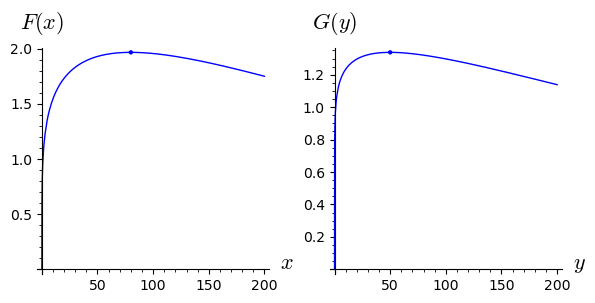

In [117]:
show(graphics_array([
    f.plot(x, 0, 200, axes_labels=['$x$', '$F(x)$']) + point((80,f(80))),
    g.plot(y, 0, 200, axes_labels=['$y$', '$G(y)$']) + point((50,g(50)))
]), figsize=(6,3))

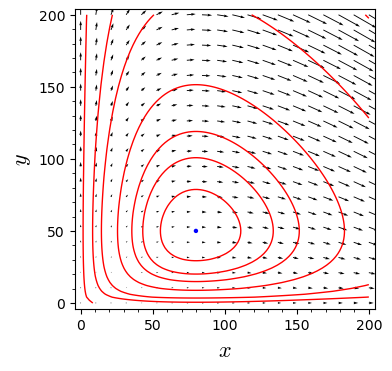

In [118]:
phase_plane = vf + contour_plot(
                f(x)*g(y), (x,0,200), (y,0,200),
                contours=[1.5, 2, 2.2, 2.4, 2.5, 2.55, 2.6, 2.65, 2.69],
                fill=False, linewidths=1, cmap=['red'],
                axes_labels=['$x$', '$y$']
            )
phase_plane

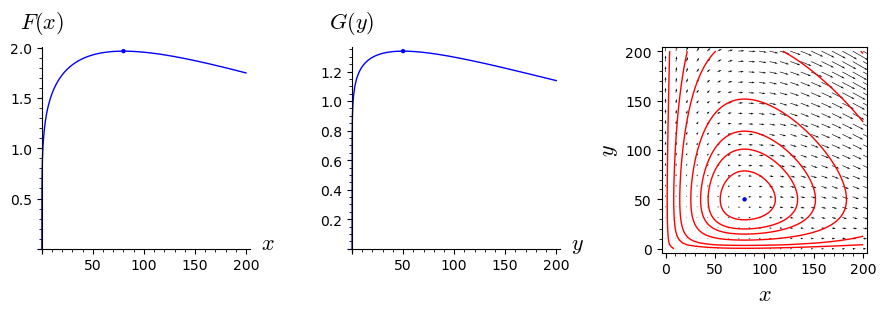

In [119]:
show(
    graphics_array([
        f.plot(x, 0, 200, axes_labels=['$x$', '$F(x)$']) + point((80,f(80))),
        g.plot(y, 0, 200, axes_labels=['$y$', '$G(y)$']) + point((50,g(50))),
        phase_plane
    ]),
    figsize=(9,3)
)

In [113]:
show(F(x)*G(y))

x^gamma*y^alpha*e^(-delta*x - beta*y)

### Modelo de competición de Lotka-Volterra

In [156]:
F = vector((0.004*x*(50 - x - 0.75*y), 0.001*y*(100 - y - 3*x)))

In [157]:
solve([F[0] == 0, F[1] == 0], x, y)

[[x == 0, y == 0], [x == 50, y == 0], [x == 0, y == 100], [x == 20, y == 40]]

In [158]:
df = jacobian(F, (x, y))
df

[-0.00800000000000000*x - 0.00300000000000000*y + 0.200000000000000                                             -0.00300000000000000*x]
[                                            -0.00300000000000000*y -0.00300000000000000*x - 0.00200000000000000*y + 0.100000000000000]

In [179]:
A = df(x=20,y=40)
A

[-0.0800000000000000 -0.0600000000000000]
[ -0.120000000000000 -0.0400000000000000]

In [180]:
A.eigenvalues()

[-1/50*sqrt(19) - 3/50, 1/50*sqrt(19) - 3/50]

In [170]:
A.det()

0.0100000000000000

In [171]:
A.trace()

-0.250000000000000

In [172]:
A.trace()^2 - 4*A.det()

0.0225000000000000

In [181]:
maxima('plotdf([0.004*x*(50 - x- 0.75*y), 0.001*y*(100 - y - 3*x)],[x,-10,100],[y,-20,150])')

"/Users/ernesto/.sage/temp/Ernestos-MBP-2/12258/ecl/maxout12558.xmaxima"